<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Do_Adversarially_Robust_ImageNet_Models_Transfer_Better%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Do Adversarially Robust ImageNet Models Transfer Better?**

논문 링크: https://arxiv.org/abs/2007.08489

전이 학습(transfer learning)은 요즘 kaggle 등 여러 딥러닝에서 쉽고 간단하게 고성능을 얻을 수 있기 때문에 굉장히 자주 쓰이는 학습 방법이며, 최근에는 거의 기본값으로 이를 사용한다고 해도 과언이 아니다. 

전이 학습은 ImageNet과 같은 스탠다드한 dataset으로 pre-trained된 model의 학습된 weight를 가져와 이미 model이 갖고 있는 지식을 다른 task에 활용하는 학습 방식을 말한다. 즉, source task에서 학습한 내용을 target task로 옮기는 것이라고 보면 된다. 본 논문의 저자는 transfer learning을 두 가지로 나눈다.

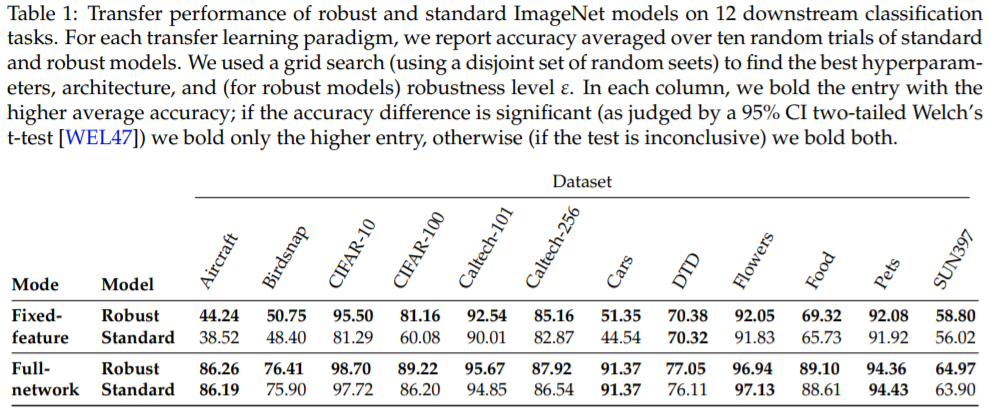

첫 번째는 **fixed-feature transfer learning으로 앞의 weight는 고정하고 뒤의 classification layer만 다시 train을 하는 방법**이다. 두 번째는 **full network transfer learning으로 이름대로 initial weight만 가져오고 모두 fine-tuning하는 방식**이다. 위의 표 Table 1은 각각의 전이 학습 패러다임에 대해 standard model과 robust model에 대해 10번의 무작위 시행을 통한 평균 정확도이다.

해당 결과는 재미있게도 transfer learning의 성능이 pretrained된 model의 accuracy만 좌우하는 것이 아니며, 또 다른 factor가 **adversarial robustness**이라는 본 논문이 주장하는 가설과 일치한다. 

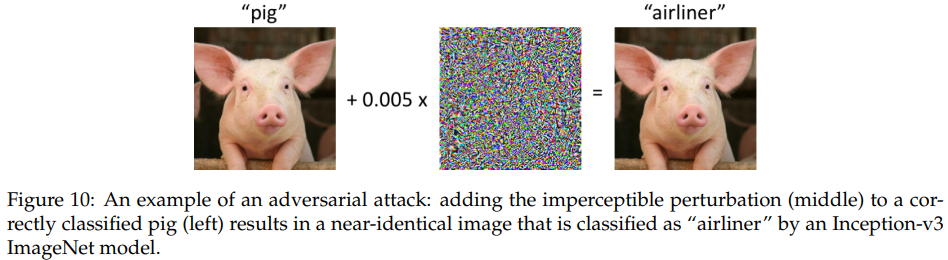

이때, adversarial robustness에 대해서는 FGSM 등 여러 논문에서 살펴봤으므로 자세한 설명은 생략하겠다.

## **어떻게 해야 transfer learning의 성능을 향상시킬 수 있을까?**

위의 표 Table 1에서 살펴본 fixed-feature transfer learning은 마지막 layer를 제외한 다른 layer들을 특징 추출기(feature extractor)로 사용하고 classification layer만(주로 linear 부분) 학습을 시키는 방식이다. 이 접근 방식을 적용하면 다양한 vision 작업에 대해 높은 정확도 성능을 보여준다. 하지만 여전히 transfer learning의 성능을 유도하는 요인을 완전히 파악하고 있지 않다.

그러면 과연 어떻게 transfer learning을 개선할 수 있을까?

이전의 논문들은 더 높은 정확도(accuracy)가 곧 좋은 transfer learning의 결과를 산출해낸다고 연구 결과들을 발표하였다. 하지만 앞에서 언급했듯이 **오직 정확도를 향상시키는 것이 transfer learning의 성능을 향상시키는 유일한 방법은 아니다**. 예시로는 architectural components를 사용하는 방법이나 대체 loss function을 사용하는 방법이나 data augmentation 등이 있다.

정리하자면, transfer learning의 성능을 높이기 위해선 양질의 feature extractor를 얻어야 하고, 양질의 feature extractor를 얻기 위해선 각종 기법들을 적용할 수 있는데, 그 중 본 논문이 포커스를 맞춘 것이 바로 adversarial robustness를 증가시키는 것이다.

하지만 이때 모순이 생겨버리는데, **adversarially robust하게 network를 train한다면 trade-off 관계가 생기기 때문에 standard test set에 대한 accuracy가 떨어지게 된다**.

본 논문은 이에 대해 2가지를 언급하였는데, 첫 번째는 기존 연구자들의 의견으로 adversarially robust하게 학습을 시키면 standard accuracy가 떨어지기 때문에 transfer learning의 성능이 떨어진다는 의견이다. 두 번째는 본 논문의 저자의 주장으로 **adversarially robust하게 학습을 시키면 feature representation의 품질이 좋아지기 때문에 transfer learning의 성능도 좋아진다**는 의견이다.

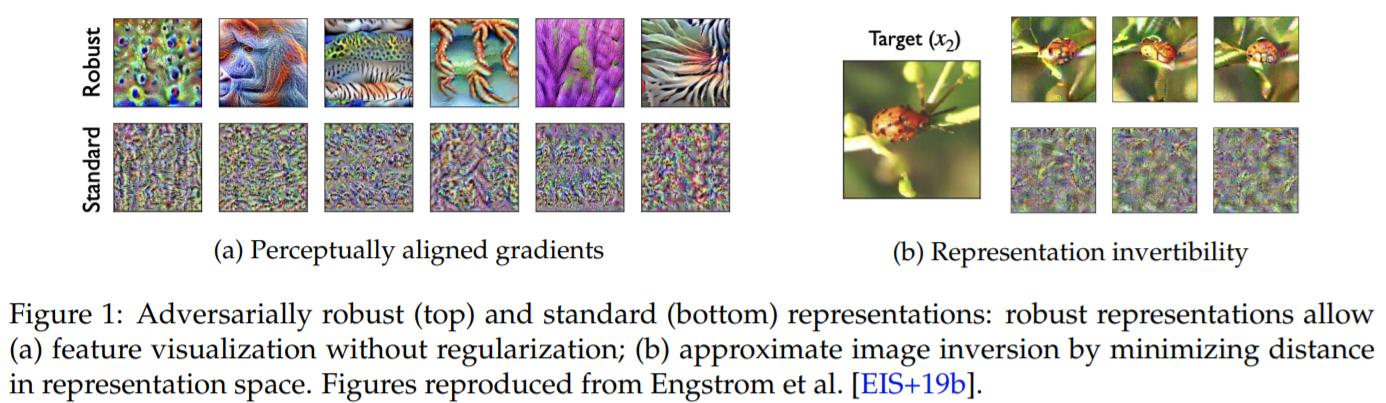

본 논문의 주장을 뒷 바침하는 연구 결과들이 있는데, adversarially robust은 일반적으로 더 잘 작동하는 기울기를 가지기 때문에 위의 그림 Figure 1의 (a) 부분과 같이 regularization이 필요없는 feature visualization을 갖는다. 또한, Figure 1의 (b) 부분과 같이 standard model과 달리 image가 robust representation에서 직접 대략적인 재구성을 할 수가 있다.

뿐만아니라 다른 논문에서는 network가 인간도 피할 수 없는 신호에 강제로 노출되기 때문에 인간과 더 유사하게 특징 표현을 할 수 있다는 가설도 있다.

## **Experiments**

과연 본 논문에서 세운 가설이 맞을까? 실험 결과를 통해 알아보겠다.

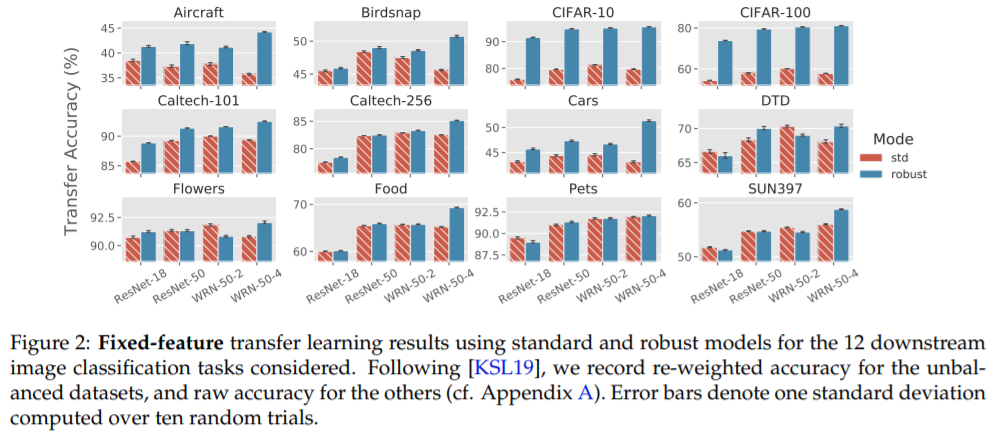

위의 그림 Figure 2는 12가지의 다른 dataaset에 대해 transfer accuracy를 측정한 결과이다. 앞단의 weight를 고정하고 뒷단의 classification layer만 다시 train을 진행하는 fixed-feature transfer learning에서는 대부분이 파란색의 결과 즉, robust한 경우가 더 높은 accuracy를 보여준다.

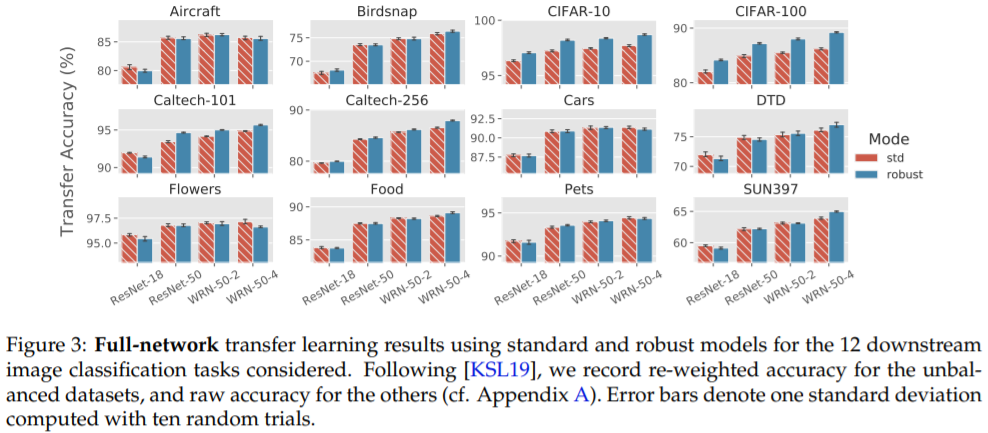

위의 그림 Figure 3은 network의 initial weight만 가져와 모두 fine-tuning하는 full-network transfer learning에서는 12가지의 dataset에 대해 방금 살펴본 fixed-feature transfer learning보다 우수한 결과를 가져왔다. 뿐만 아니라 standard보다 robust learning의 방식이 더 우수한 transfer accuracy를 보여준다.

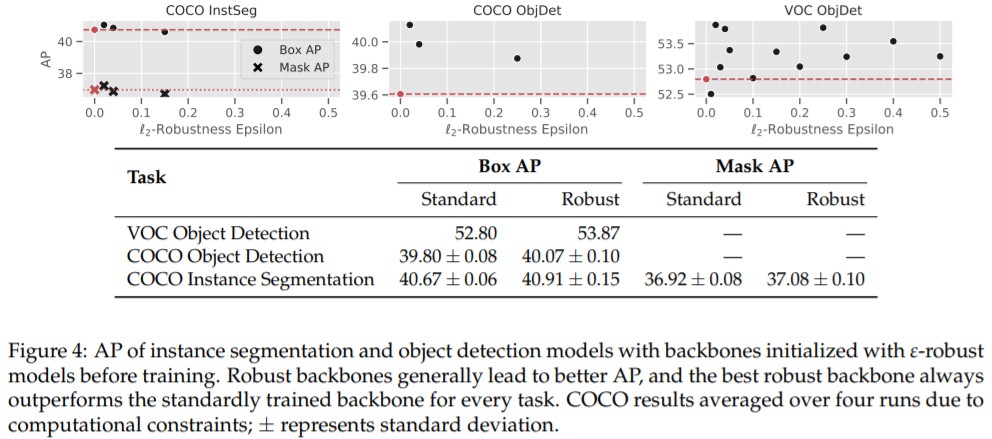

위의 그림 Figure 4를 보면 classification 뿐만아니라 다른 vision task인 object detection과 instance segmentation에서도 ImageNet 기반의 pretrained network를 robust transfer learning로 진행한 경우가 더 좋은 정확도를 보여주는 것을 알 수 있다.

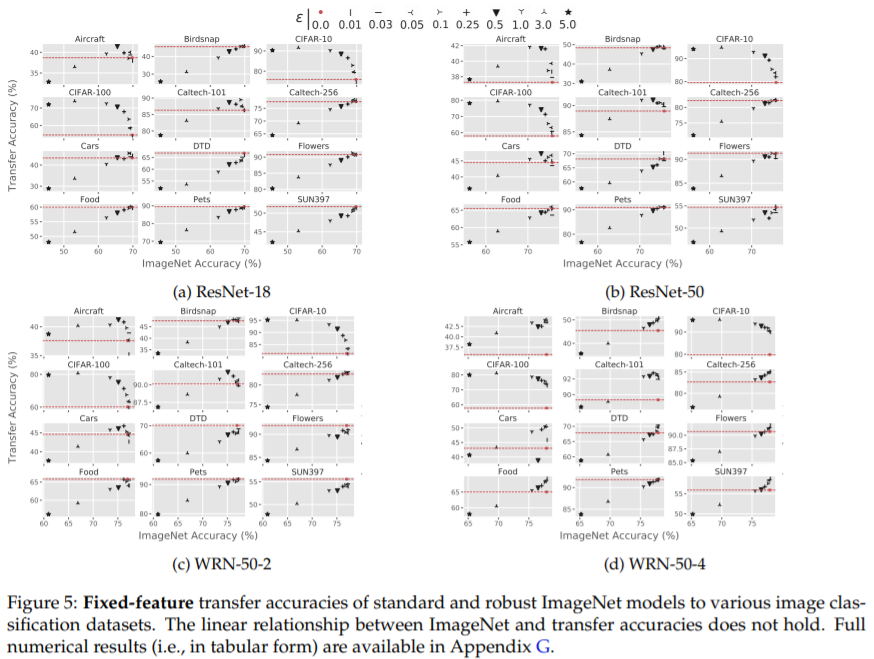

위의 실험 결과는 다양한 adversarial robust level에 따른 standard acc와 transfer acc를 각각 x축과 y축으로 나타낸 그래프이다. 빨간색 점선은 standard network의 transfer acc를 의미한다. 결과를 살펴보면 대체로 x축이 커지면 y축도 커지는 경향을 보이며, CIFAR-10/100이나 Caltech-101과 같이 그렇지 않는 경우도 존재하는 것을 알 수 있다. 또한, robust model을 사용할 때가 그렇지 않을 때보다 항상 위에 존재할 수 있음을 알 수 있다.

이러한 실험을 텅해 standard acc와 transfer acc는 어느 정도 양의 trade-off 관계를 가지지만, adversarial robustness를 고려하면 그렇지 않는 경우가 발생하며, 이를 통해 robustness와 standard acc는 분리해서 생각해야함을 시사하고 있다. 즉, **고정된 robustness 값에서는 높은 standard acc일 때 더 좋은 transfer acc를 가지고, 고정된 standard acc에서는 높은 robustness일 때 더 좋은 transfer acc를 가지는 것을 의미**한다.

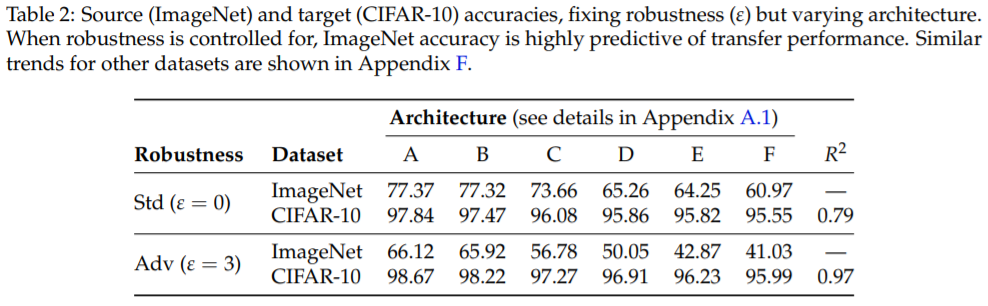

위의 표 Table 2는 이를 더 자세히 확인하기 위해 robustness level을 각각 0과 3으로 고정해두고 다양한 architecture에 대해 실험을 수행한 결과이다. standard model을 사용했을 때에 source data의 acc와 transfer acc의 correlation이 0.79인 반면, robust model을 사용하면 둘 간의 correlation이 0.98로 매우 커지는 것을 알 수 있다.

기존 연구들에서는 network의 depth(= layer의 수)를 키우는 것은 transfer acc에 좋은 영향을 준 반면에 network의 width(= channel의 수)를 키우는 것은 반대로 transfer acc에 안좋은 영향을 준다는 연구 결과가 있었다.

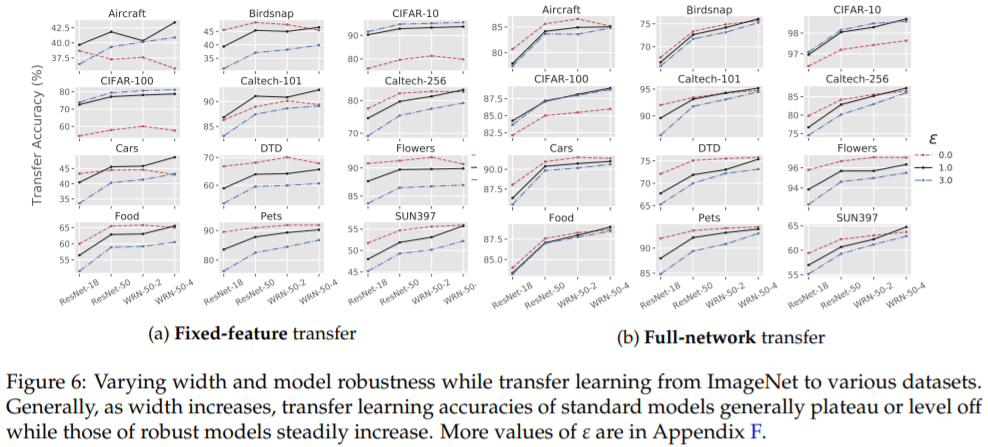

따라서 본 논문에서도 이러한 영향이 robust model에서도 관찰이 되는지 확인을 위해 위의 그림 Figure 6과 같이 실험을 수행했다. 실험 결과 standard model의 경우(빨간 점선에 해당) **width를 키워줄 수록 transfer acc도 같이 증가**하는 것을 알 수 있다.

다음으론 각 dataset마다 가장 transfer 성능이 좋았던 robustness parameter에 대한 고찰이다. CIFAR-10/100에서는 각각 1, 3일 때가 최적인 반면, 나머지 10개의 dataset에 대해서는 굉장히 작은 값의 입실론 ε을 사용할 때가 성능이 좋았다. CIFAR dataset과 다른 dataset의 가장 큰 차이점은 image resolution이다.

CIFAR dataset은 32 x 32 size로 굉장히 작은 resolution의 image로 구성이 되어 있기 때문에, input image resolution을 dataset의 granularity라고 가정을 한 뒤, dataset의 granularity와 최적의 robustness parameter 입실론이 관게가 있을 것이라는 가설을 세웠다.

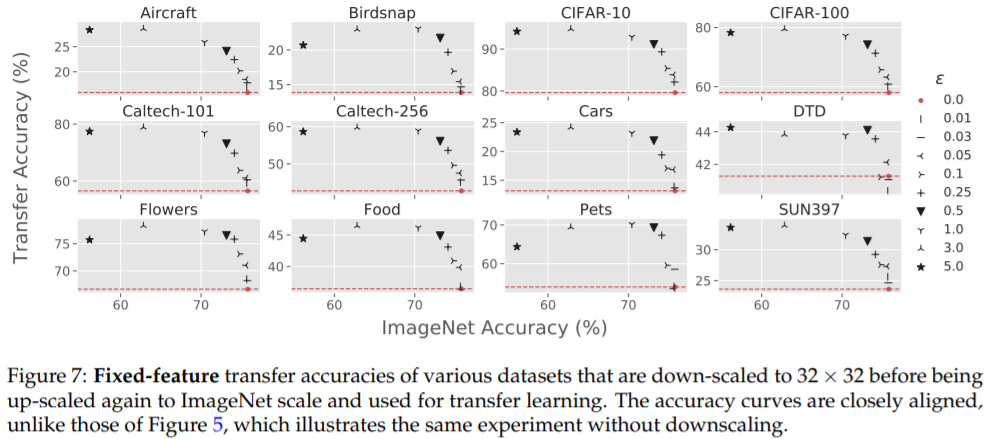

따라서 이를 검증하기 위하여 나머지 10개의 dataset도 CIFAR과 같이 32 x 32 size로 줄인 뒤 transfer learning을 수행한 결과가 바로 위의 그림 Figure 7이다. 저자들의 예상대로 input resolution을 맞추더니 비슷한 경향이 나왔다. 이를 통해 **dataset의 granularity가 높을수록 즉, image의 resolution이 높을 수록 더 작은 입실론 값을 사용하는 것이 더 유리하다**라는 것을 알 수 있다.

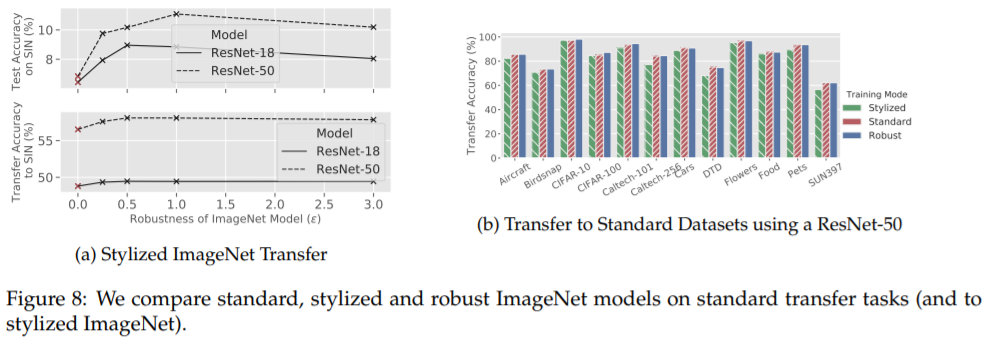

마지막으로 Stylized ImageNet dataset으로 학습시킨 texture invariant model과 성능을 비교한 것인데, 실험 결과 위의 그림 Figure 8에서 볼 수 있듯이 adversarially robust model이 texture-invariant model보다 더 좋은 성능을 달성할 수 있다.